## 03. CNN and Computer Vision with TensorFlow

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2023-10-12 09:01:34.151042


In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-12 09:03:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.196.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   155MB/s    in 0.7s    

2023-10-12 09:03:25 (155 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


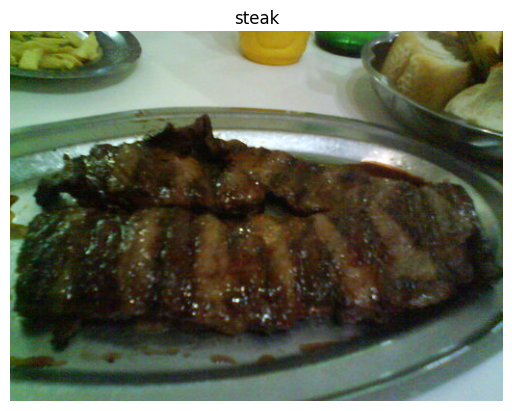

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
# View the img (actually just a big array / tensor)
img

array([[[ 79, 121,   9],
        [ 86, 124,  13],
        [ 95, 128,  21],
        ...,
        [164, 153, 108],
        [145, 133,  83],
        [127, 114,  61]],

       [[ 86, 117,   0],
        [ 89, 118,   2],
        [ 97, 121,   9],
        ...,
        [168, 156,  84],
        [149, 137,  53],
        [130, 116,  28]],

       [[ 97, 110,   0],
        [ 97, 110,   0],
        [ 99, 113,   2],
        ...,
        [165, 155,  66],
        [145, 133,  35],
        [122, 109,   7]],

       ...,

       [[ 98, 154, 129],
        [ 97, 155, 130],
        [ 94, 159, 129],
        ...,
        [167, 196, 204],
        [167, 196, 204],
        [167, 196, 204]],

       [[115, 146, 128],
        [116, 148, 125],
        [117, 150, 119],
        ...,
        [167, 195, 207],
        [168, 196, 208],
        [169, 197, 209]],

       [[107, 150, 123],
        [110, 151, 119],
        [115, 152, 109],
        ...,
        [165, 194, 208],
        [168, 197, 211],
        [171, 200, 214]]

In [12]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [13]:
# Get all the pixel values between [0; 1]
img/255.

array([[[0.30980392, 0.4745098 , 0.03529412],
        [0.3372549 , 0.48627451, 0.05098039],
        [0.37254902, 0.50196078, 0.08235294],
        ...,
        [0.64313725, 0.6       , 0.42352941],
        [0.56862745, 0.52156863, 0.3254902 ],
        [0.49803922, 0.44705882, 0.23921569]],

       [[0.3372549 , 0.45882353, 0.        ],
        [0.34901961, 0.4627451 , 0.00784314],
        [0.38039216, 0.4745098 , 0.03529412],
        ...,
        [0.65882353, 0.61176471, 0.32941176],
        [0.58431373, 0.5372549 , 0.20784314],
        [0.50980392, 0.45490196, 0.10980392]],

       [[0.38039216, 0.43137255, 0.        ],
        [0.38039216, 0.43137255, 0.        ],
        [0.38823529, 0.44313725, 0.00784314],
        ...,
        [0.64705882, 0.60784314, 0.25882353],
        [0.56862745, 0.52156863, 0.1372549 ],
        [0.47843137, 0.42745098, 0.02745098]],

       ...,

       [[0.38431373, 0.60392157, 0.50588235],
        [0.38039216, 0.60784314, 0.50980392],
        [0.36862745, 0

### A typical CNN architecture (e.g., TinyVGG which fuels the CNN explainer - https://poloclub.github.io/cnn-explainer/

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values bw. 0 & 1, also called scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3, # can also be (3, 3)
                           activation="relu",
                           input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, color channels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                              padding="valid"), # padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 67s 1s/step - loss: 0.5631 - accuracy: 0.7060 - val_loss: 0.4302 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 85s 2s/step - loss: 0.4479 - accuracy: 0.7973 - val_loss: 0.3717 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 79s 2s/step - loss: 0.3918 - accuracy: 0.8247 - val_loss: 0.3287 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 63s 1s/step - loss: 0.3623 - accuracy: 0.8513 - val_loss: 0.3081 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.3267 - accuracy: 0.8673 - val_loss: 0.3141 - val_accuracy: 0.8580


In [16]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dim vector as input
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 6s 105ms/step - loss: 0.6760 - accuracy: 0.5753 - val_loss: 0.6136 - val_accuracy: 0.7280
Epoch 2/5
47/47 [==============================] - 5s 106ms/step - loss: 0.5920 - accuracy: 0.7260 - val_loss: 0.5703 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 5s 99ms/step - loss: 0.5682 - accuracy: 0.7533 - val_loss: 0.5569 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5488 - accuracy: 0.7653 - val_loss: 0.5542 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.5334 - accuracy: 0.7720 - val_loss: 0.5410 - val_accuracy: 0.7720


In [19]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 4)                 602116    
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1, but add an extra layer and increase the no. of hidden units in each layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dim vector as input
    tf.keras.layers.Dense(100, activation='relu'), # increase the no. of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 258ms/step - loss: 1.6545 - accuracy: 0.6453 - val_loss: 1.0404 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 13s 280ms/step - loss: 0.8869 - accuracy: 0.6867 - val_loss: 0.5257 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 11s 243ms/step - loss: 0.5239 - accuracy: 0.7693 - val_loss: 0.4977 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6226 - accuracy: 0.7420 - val_loss: 0.4028 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.4733 - accuracy: 0.7913 - val_loss: 0.4315 - val_accuracy: 0.8000


In [21]:
# Check our model_3 architecture
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 100)               15052900  
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Binary Classification

In [ ]:
# import zipfile
# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extract.all()
# zip_ref.close()

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


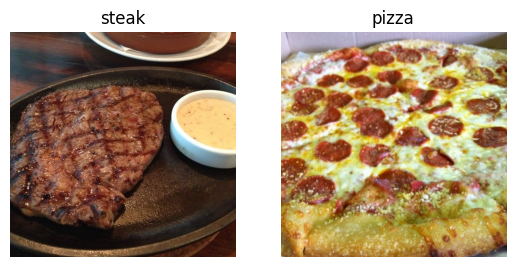

In [22]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [23]:
### Preprocess the data (prepare it for our model) ###
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [27]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this can be our baseline, a 3-layer CNN)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [31]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
# Check lenghts of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 88s 2s/step - loss: 0.9372 - accuracy: 0.6120 - val_loss: 0.4393 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 90s 2s/step - loss: 0.4254 - accuracy: 0.8193 - val_loss: 0.3853 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 97s 2s/step - loss: 0.3244 - accuracy: 0.8687 - val_loss: 0.3571 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 101s 2s/step - loss: 0.2210 - accuracy: 0.9320 - val_loss: 0.3521 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 79s 2s/step - loss: 0.1168 - accuracy: 0.9647 - val_loss: 0.3991 - val_accuracy: 0.8460


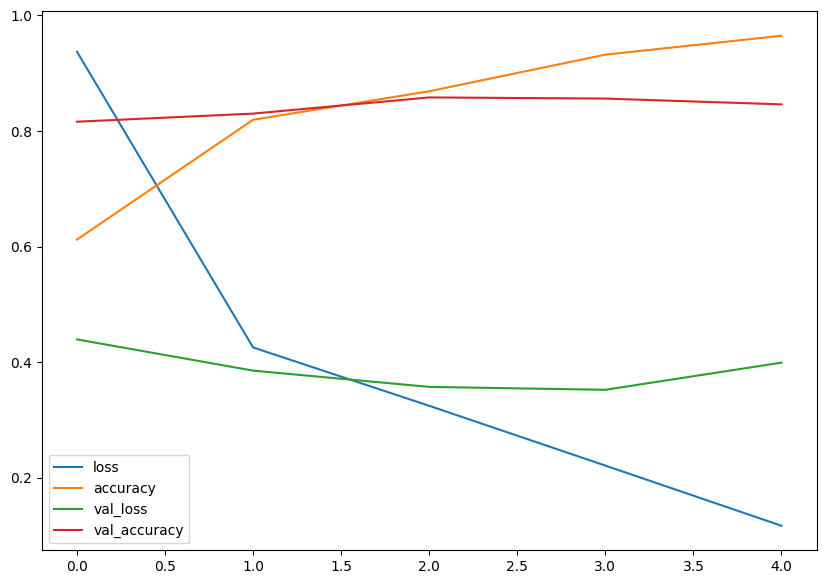

In [35]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [17]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

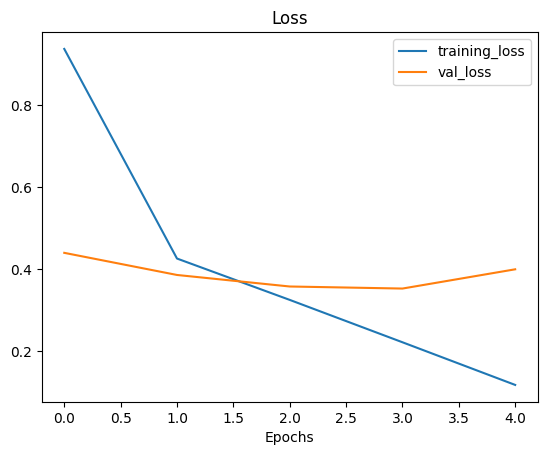

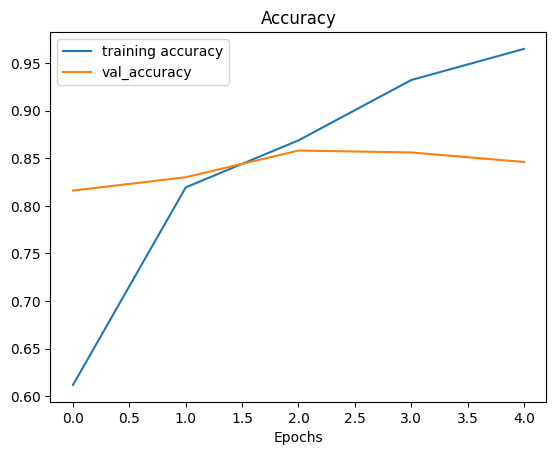

In [37]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [38]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_11 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
# Create the model (this can be our baseline (to adjust later), a 3-layer CNN)
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce no. of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [41]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 819ms/step - loss: 0.6070 - accuracy: 0.6813 - val_loss: 0.4571 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 40s 846ms/step - loss: 0.4635 - accuracy: 0.7973 - val_loss: 0.4219 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 51s 1s/step - loss: 0.4284 - accuracy: 0.8053 - val_loss: 0.3661 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 43s 916ms/step - loss: 0.4287 - accuracy: 0.8053 - val_loss: 0.3521 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 50s 1s/step - loss: 0.3932 - accuracy: 0.8400 - val_loss: 0.3452 - val_accuracy: 0.8600


In [43]:
# Check out the model architecture
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

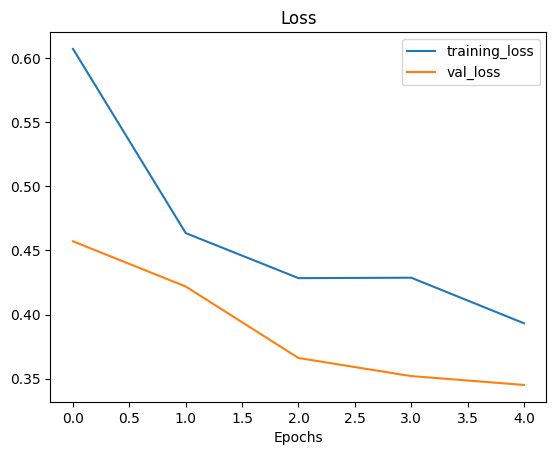

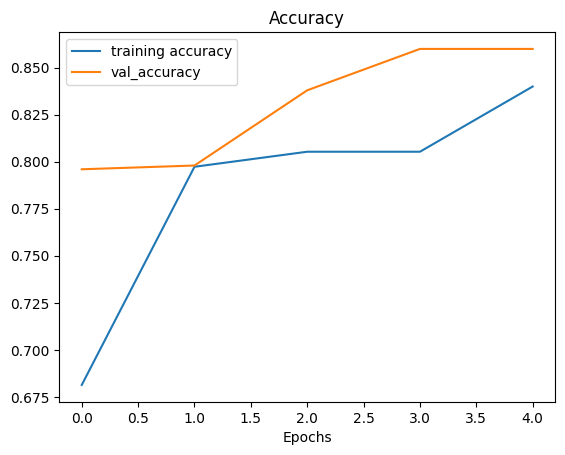

In [44]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [45]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly bw. 0 & 20 degrees (note: this is an int, not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shif the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance w/o data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance w/o data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [47]:
# Import data and augment it from the training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # ditto above

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [49]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

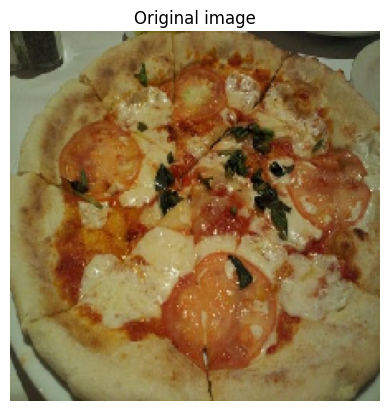

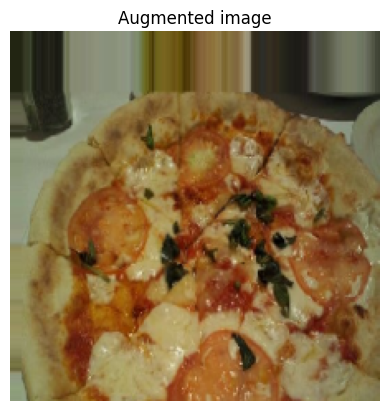

In [50]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [53]:
# Now we've got augmented data, let's try and refit a model on it to see how it affects training
# Create the model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augment training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 48s 988ms/step - loss: 0.7247 - accuracy: 0.5380 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 48s 1s/step - loss: 0.6921 - accuracy: 0.5433 - val_loss: 0.6638 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 58s 1s/step - loss: 0.6699 - accuracy: 0.6487 - val_loss: 0.6151 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 54s 1s/step - loss: 0.6746 - accuracy: 0.6240 - val_loss: 0.6453 - val_accuracy: 0.5760
Epoch 5/5
47/47 [==============================] - 64s 1s/step - loss: 0.6597 - accuracy: 0.6060 - val_loss: 0.5708 - val_accuracy: 0.7920


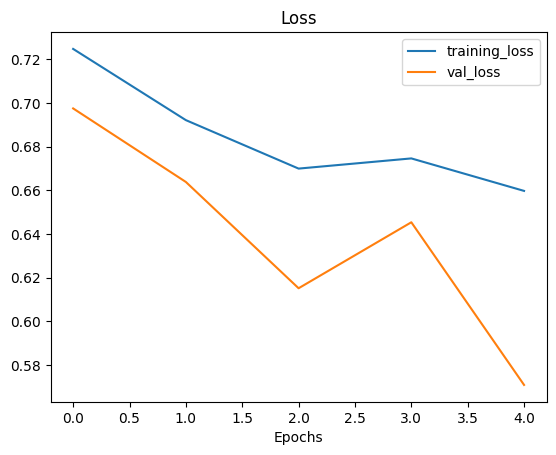

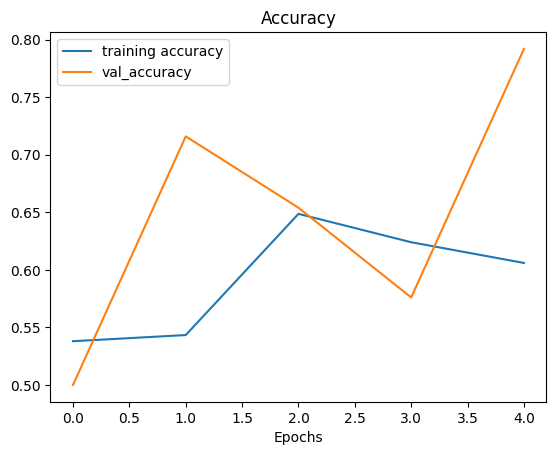

In [55]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [56]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # gen. a good idea to shuffle

Found 1500 images belonging to 2 classes.


In [57]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 50s 1s/step - loss: 0.6265 - accuracy: 0.6400 - val_loss: 0.5731 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.5571 - accuracy: 0.7153 - val_loss: 0.4159 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.4959 - accuracy: 0.7547 - val_loss: 0.3697 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 51s 1s/step - loss: 0.4988 - accuracy: 0.7753 - val_loss: 0.3795 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 61s 1s/step - loss: 0.4905 - accuracy: 0.7673 - val_loss: 0.3516 - val_accuracy: 0.8480


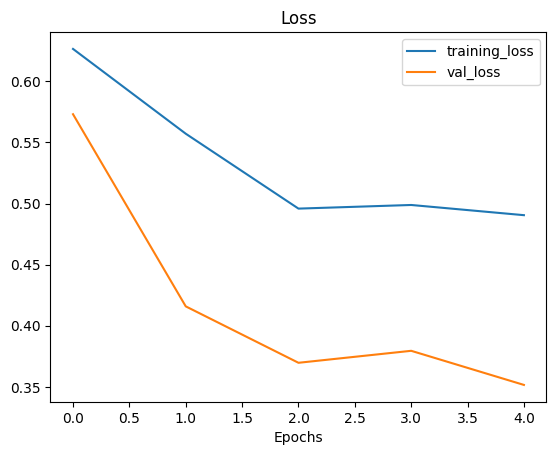

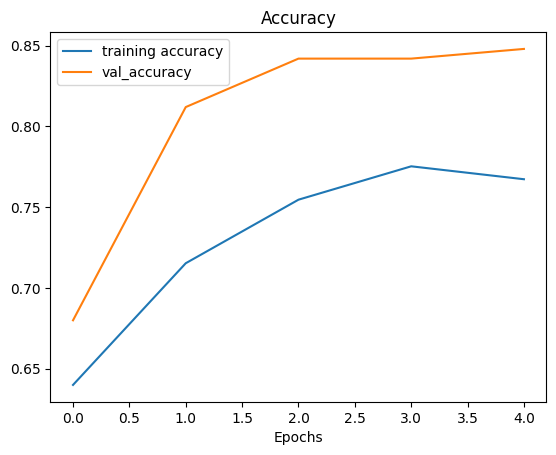

In [58]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [59]:
# Create a CNN model (same as Tiny VGG, but for binary classification - https://poloclub.github.io/cnn-explainer/)
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 87s 2s/step - loss: 0.6446 - accuracy: 0.6340 - val_loss: 0.5356 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 70s 1s/step - loss: 0.5540 - accuracy: 0.7080 - val_loss: 0.4155 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 71s 2s/step - loss: 0.5110 - accuracy: 0.7387 - val_loss: 0.4116 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 74s 2s/step - loss: 0.4986 - accuracy: 0.7680 - val_loss: 0.3657 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 82s 2s/step - loss: 0.4569 - accuracy: 0.7873 - val_loss: 0.4364 - val_accuracy: 0.7880


In [60]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [61]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                               

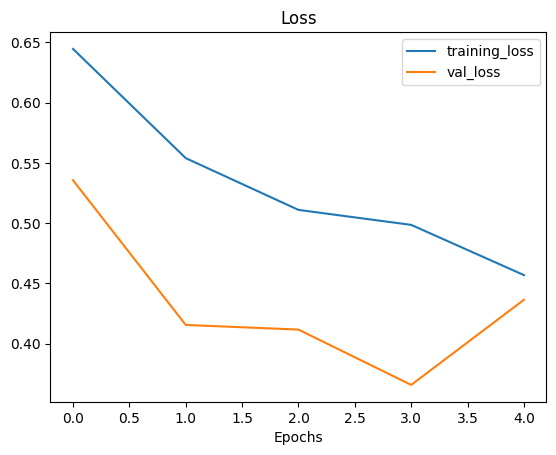

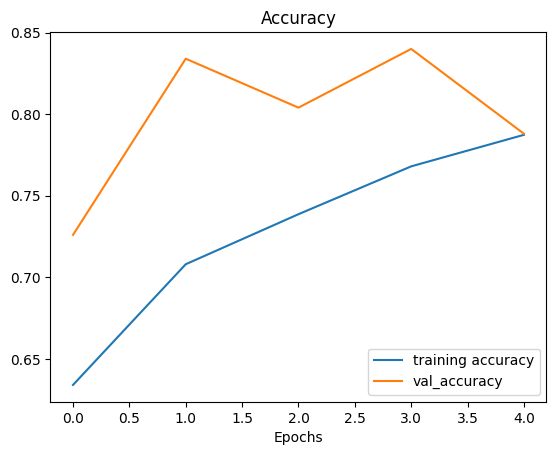

In [62]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

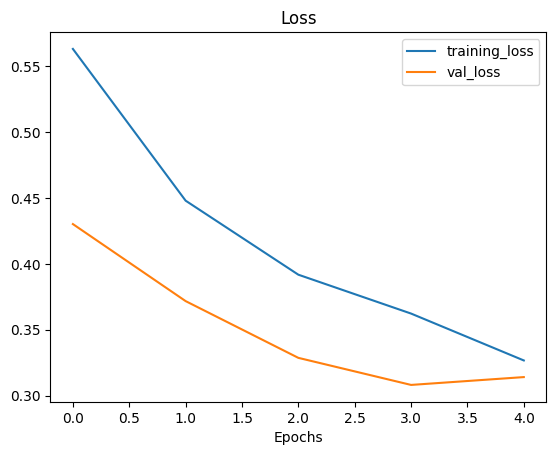

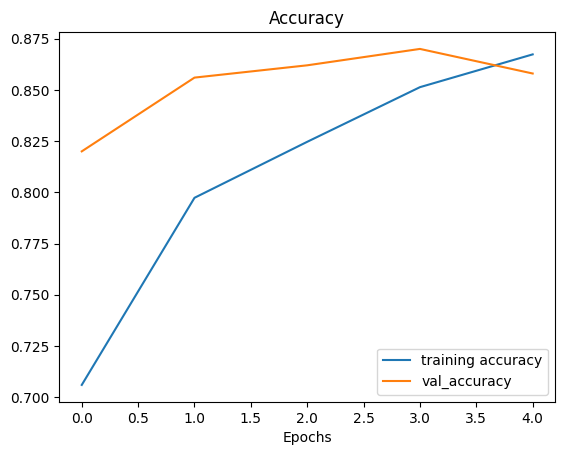

In [63]:
# How does this training curve looks compared to the one above?
plot_loss_curves(history_1)

In [64]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-10-12 11:50:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2023-10-12 11:50:35 (20.6 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



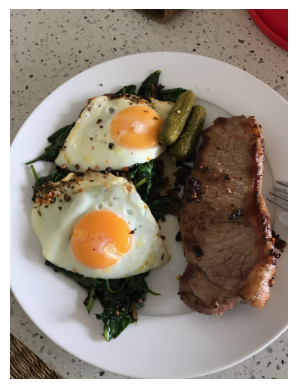

In [66]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [67]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [31]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor,
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor and ensure 3 colour channels
  # (our model is trained on images w/ 3 colour channels, but sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values bw. 0 & 1)
  img = img/255.
  return img

In [69]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [70]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

In [71]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
# steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [72]:
# Make prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 441ms/step


array([[0.9210702]], dtype=float32)

In [73]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [74]:
# We can index the predicted class by rounding the Pred Prob
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [32]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 44ms/step


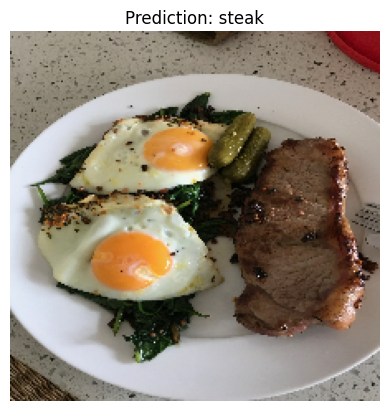

In [76]:
# Test our model on our custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-10-12 12:07:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2023-10-12 12:07:35 (26.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 32ms/step


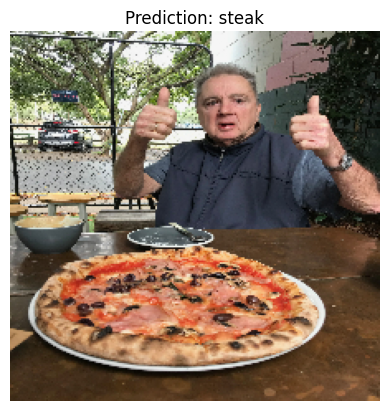

In [77]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

### Multi-class Classification

#### 1. Import and become one with the data

In [3]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-13 07:53:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.207, 142.250.148.207, 209.85.200.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   197MB/s    in 2.5s    

2023-10-13 07:53:32 (197 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [4]:
import os

# Walk through 10_food_classes directory and list the number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
# (M) Added from kaggle - https://www.kaggle.com/code/saimislam/basic-image-classification-using-cnn-in-tensorflow

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [7]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


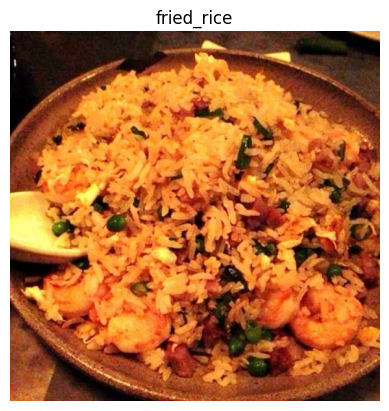

In [11]:
# View a random image from the dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

#### 2. Preprocess the data (prepare it for a model)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### 3. Create a model (start with a baseline)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax') # changed to have 10 neurons (same as no. of classes) and 'softmax' for multi-class
])

# Compile the model
model_9.compile(loss='categorical_crossentropy', # changed to categorical_crossentropy for multi-class
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#### 4. Fit the model

In [14]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 133ms/step - loss: 2.1136 - accuracy: 0.2336 - val_loss: 1.9453 - val_accuracy: 0.3072
Epoch 2/5
235/235 [==============================] - 28s 120ms/step - loss: 1.8387 - accuracy: 0.3609 - val_loss: 1.8692 - val_accuracy: 0.3476
Epoch 3/5
235/235 [==============================] - 28s 121ms/step - loss: 1.5473 - accuracy: 0.4772 - val_loss: 1.9824 - val_accuracy: 0.3108
Epoch 4/5
235/235 [==============================] - 29s 122ms/step - loss: 1.1519 - accuracy: 0.6233 - val_loss: 2.3039 - val_accuracy: 0.2904
Epoch 5/5
235/235 [==============================] - 29s 124ms/step - loss: 0.6858 - accuracy: 0.7763 - val_loss: 3.1645 - val_accuracy: 0.2820


#### 5. Evaluate the model

In [15]:
# Evaluate of the test data
model_9.evaluate(test_data)

79/79 [==============================] - 8s 98ms/step - loss: 3.1645 - accuracy: 0.2820


[3.1644599437713623, 0.28200000524520874]

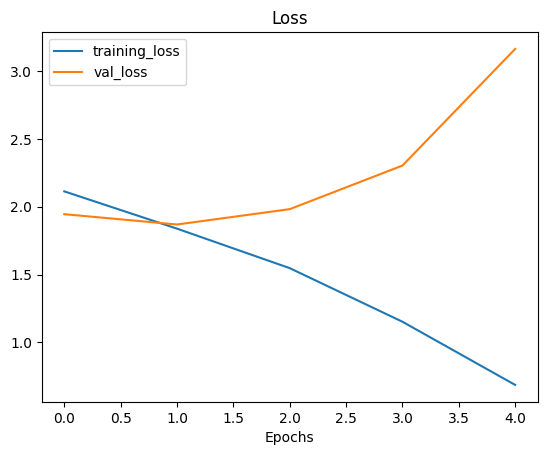

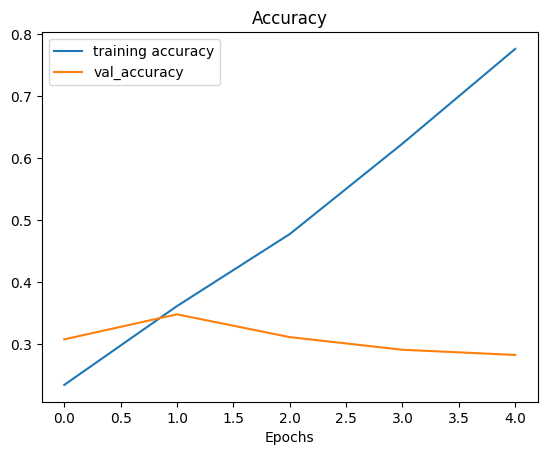

In [19]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in notebook)
plot_loss_curves(history_9)

#### 6. Adjust the model parameters

In [20]:
# Try a simplified model (removed 2 layers)
model_10 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 33s 133ms/step - loss: 2.1645 - accuracy: 0.2227 - val_loss: 1.9996 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.8183 - accuracy: 0.3805 - val_loss: 1.9803 - val_accuracy: 0.3092
Epoch 3/5
235/235 [==============================] - 27s 114ms/step - loss: 1.4247 - accuracy: 0.5300 - val_loss: 2.1043 - val_accuracy: 0.2780
Epoch 4/5
235/235 [==============================] - 28s 118ms/step - loss: 0.8807 - accuracy: 0.7253 - val_loss: 2.5403 - val_accuracy: 0.2736
Epoch 5/5
235/235 [==============================] - 28s 118ms/step - loss: 0.4446 - accuracy: 0.8768 - val_loss: 2.8968 - val_accuracy: 0.2928


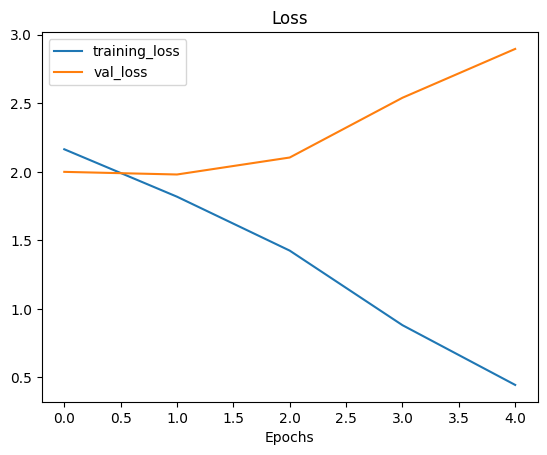

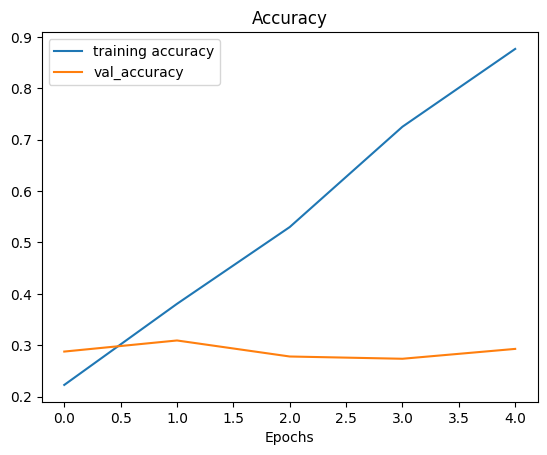

In [21]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [22]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int, not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [23]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 135s 568ms/step - loss: 2.2214 - accuracy: 0.1875 - val_loss: 2.0379 - val_accuracy: 0.2820
Epoch 2/5
235/235 [==============================] - 153s 652ms/step - loss: 2.0857 - accuracy: 0.2676 - val_loss: 1.9278 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 159s 675ms/step - loss: 2.0194 - accuracy: 0.2948 - val_loss: 1.8709 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 142s 606ms/step - loss: 1.9973 - accuracy: 0.3031 - val_loss: 1.9052 - val_accuracy: 0.3444
Epoch 5/5
235/235 [==============================] - 164s 699ms/step - loss: 1.9720 - accuracy: 0.3216 - val_loss: 1.8326 - val_accuracy: 0.3692


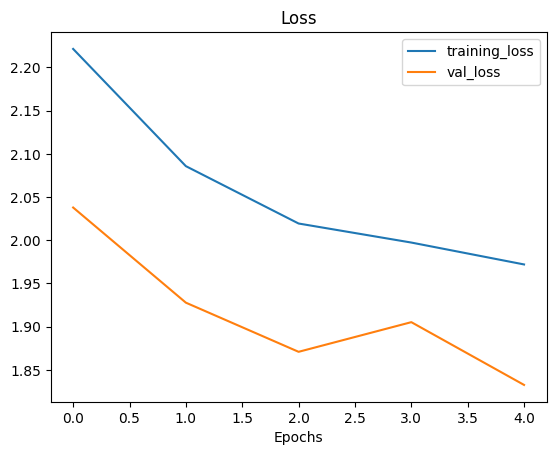

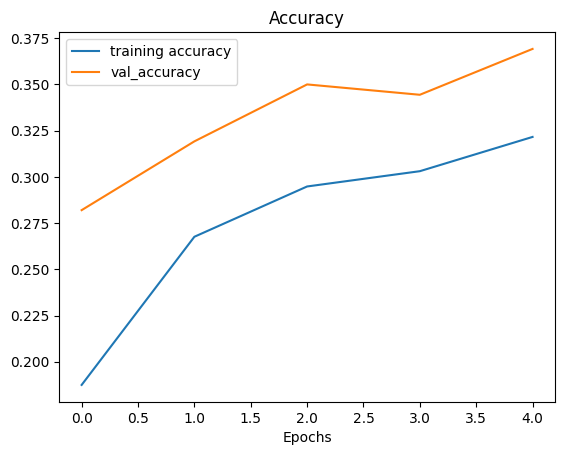

In [25]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

#### 7. Repeat until satisfied

#### Making a prediction with our trained model

In [26]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [27]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 21ms/step


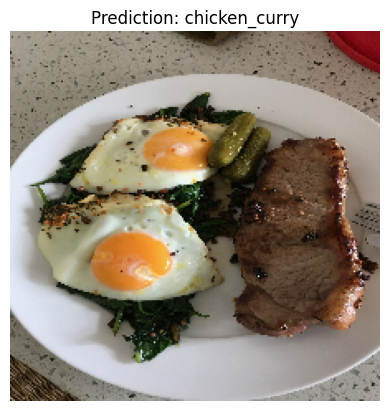

In [34]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 22ms/step


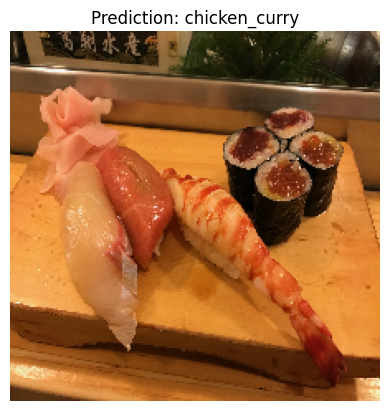

In [35]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


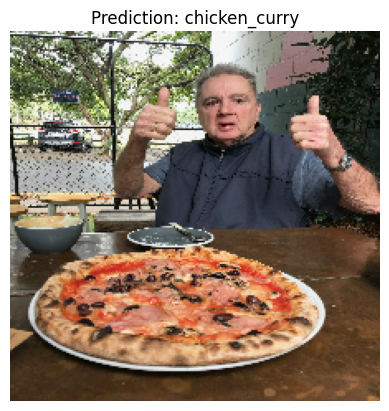

In [36]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


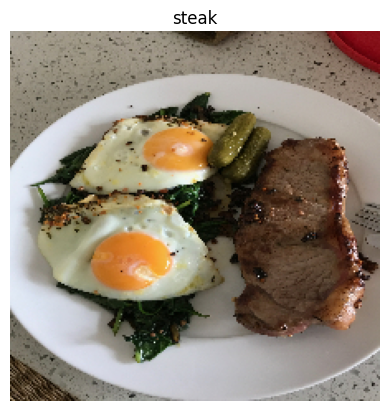

In [37]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [38]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 20ms/step


array([[0.03230503, 0.04881668, 0.04139059, 0.13766505, 0.1398931 ,
        0.10544022, 0.04591986, 0.06023149, 0.25715587, 0.13118209]],
      dtype=float32)

In [39]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [52]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than 1 output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only 1 output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 85ms/step


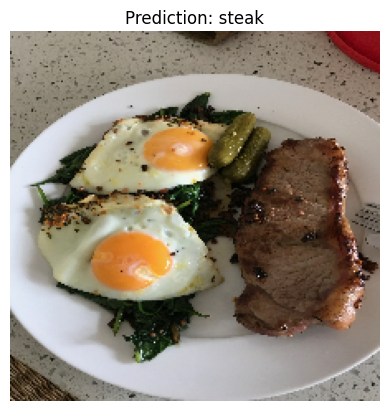

In [55]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


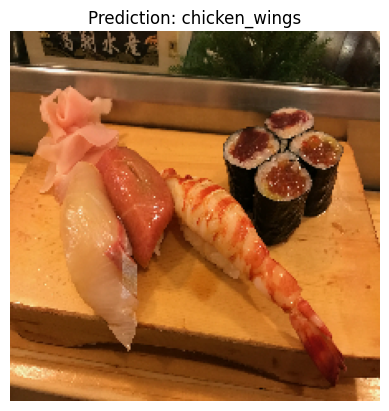

In [53]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


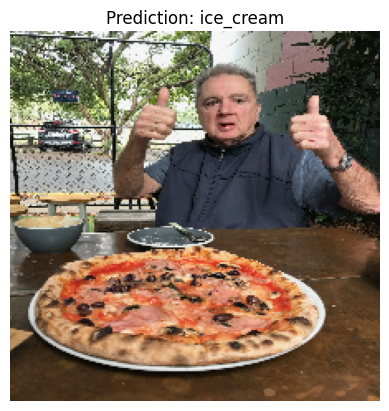

In [54]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 143ms/step


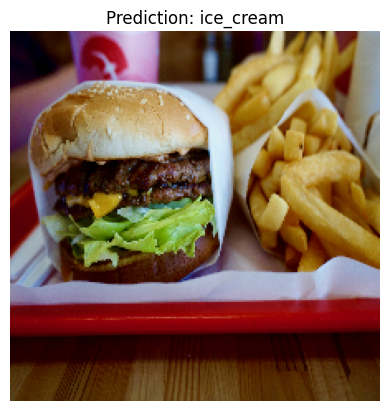

In [56]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [57]:
# Save a model
model_11.save("saved_trained_model")

In [58]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.8326 - accuracy: 0.3692


[1.8326185941696167, 0.3691999912261963]

In [59]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 8s 99ms/step - loss: 1.8326 - accuracy: 0.3692


[1.8326183557510376, 0.3691999912261963]